# Preprocessing
* drop subject
* drop date
* remove duplicate
* remove twitter tags
* remove header
* drop missing text
* delete real news tags, reduce capital in fake news
* delete frequent occuring words
* generalize words with stemming and lemmatizing


In [1]:
import pandas as pd
import string
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


df_train = pd.read_csv('https://raw.githubusercontent.com/joshuasir/datasets/master/news-train-data.csv',index_col=0)
df_unseen = pd.read_csv('https://raw.githubusercontent.com/joshuasir/datasets/master/news-test-data.csv',index_col=0)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [2]:
df_train.head()

,title,text,subject,date,validity
0,U.S. Sen. Warren predicts appeal in legal batt...,WASHINGTON (Reuters) - U.S. Senator Elizabeth ...,politicsNews,"November 28, 2017",1
1,Barbaric Bullies Set Disabled 13-Year-Old Boy...,Deandre Williams suffers from a disability whi...,News,"January 10, 2016",0
2,Zimbabwe opposition leader 'baffled' by Mugabe...,HARARE (Reuters) - Zimbabwe opposition leader ...,worldnews,"November 19, 2017",1
3,BOOM! HARVARD LAW DEMOCRAT ALAN DERSHOWITZ Des...,Democrat Alan Dershowitz dismissed a major arg...,left-news,"Jul 17, 2017",0
4,UPDATE ON BEATING OF WHITE COP: BLACK MAN STEA...,UPDATE: AND SO IT BEGINS A police officer hold...,politics,"Aug 9, 2015",0


In [3]:
df_train.drop_duplicates(subset='text',inplace=True,ignore_index=True)
df_train.drop_duplicates(subset='title',inplace=True,ignore_index=True)

df_unseen.drop_duplicates(subset='text',inplace=True,ignore_index=True)
df_unseen.drop_duplicates(subset='title',inplace=True,ignore_index=True)

In [4]:
df_train['text'] = [x.split(' (Reuters) -',1)[-1] for x in df_train['text'] if x.split(' (Reuters) -',1)[1:] is not ''  ]
df_unseen['text'] = [x.split(' (Reuters) -',1)[-1] for x in df_unseen['text'] if x.split(' (Reuters) -',1)[1:] is not ''  ]

In [5]:
df_train['title'] = df_train['title'].apply(lambda x : ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x).split()))
df_unseen['title'] = df_unseen['title'].apply(lambda x : ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x).split()))

df_train['text'] = df_train['text'].apply(lambda x : ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x).split()))
df_unseen['text'] = df_unseen['text'].apply(lambda x : ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x).split()))

In [6]:
df_train.drop(columns=['subject','date'],inplace=True)
df_unseen.drop(columns=['subject','date'],inplace=True)

In [7]:
df_train.drop(index=df_train.loc[(df_train.text.str.strip(' ') == '') ,'validity'].index,inplace=True)
df_unseen.drop(index=df_unseen.loc[(df_unseen.text.str.strip(' ') == '') ,'validity'].index,inplace=True)

In [8]:
df_train['title'] = df_train['title'].str.title()
df_unseen['title'] = df_unseen['title'].str.title()

In [9]:
df_train['text'] = df_train['title'] + ' - ' + df_train['text']
df_unseen['text'] = df_unseen['title'] + ' - ' + df_unseen['text']

In [ ]:
df_train.head()

,title,text,validity
0,U S Sen Warren Predicts Appeal In Legal Battle...,U S Sen Warren Predicts Appeal In Legal Battle...,1
1,Barbaric Bullies Set Disabled 13 Year Old Boy ...,Barbaric Bullies Set Disabled 13 Year Old Boy ...,0
2,Zimbabwe Opposition Leader Baffled By Mugabe D...,Zimbabwe Opposition Leader Baffled By Mugabe D...,1
3,Boom Harvard Law Democrat Alan Dershowitz Dest...,Boom Harvard Law Democrat Alan Dershowitz Dest...,0
4,Update On Beating Of White Cop Black Man Steal...,Update On Beating Of White Cop Black Man Steal...,0


In [10]:
df_train['text'] = df_train['text'].str.replace('https?:\/\/.*[\r\n]*', '')
df_train['text'] = df_train['text'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
df_train['text'] = df_train['text'].str.replace('\d+', '')
df_train['text'] = df_train['text'].str.replace('[^\w\s]', '')

df_unseen['text'] = df_unseen['text'].str.replace('https?:\/\/.*[\r\n]*', '')
df_unseen['text'] = df_unseen['text'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
df_unseen['text'] = df_unseen['text'].str.replace('\d+', '')
df_unseen['text'] = df_unseen['text'].str.replace('[^\w\s]', '')

In [11]:
df_train['title'] = df_train['title'].str.replace('https?:\/\/.*[\r\n]*', '')
df_train['title'] = df_train['title'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
df_train['title'] = df_train['title'].str.replace('\d+', '')
df_train['title'] = df_train['title'].str.replace('[^\w\s]', '')

df_unseen['title'] = df_unseen['title'].str.replace('https?:\/\/.*[\r\n]*', '')
df_unseen['title'] = df_unseen['title'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
df_unseen['title'] = df_unseen['title'].str.replace('\d+', '')
df_unseen['title'] = df_unseen['title'].str.replace('[^\w\s]', '')

In [12]:
df_train['text'].replace('Reuters','',inplace=True)
df_unseen['text'].replace('Reuters','',inplace=True)

df_train['text'].replace('21st Century Wire','',inplace=True)
df_unseen['text'].replace('21st Century Wire','',inplace=True)

df_train['title'].replace('White House','',inplace=True)
df_unseen['title'].replace('White House','',inplace=True)

df_train['title'].replace('North Korea','',inplace=True)
df_unseen['title'].replace('North Korea','',inplace=True)


df_train['title'].replace('Video','',inplace=True)
df_unseen['title'].replace('Video','',inplace=True)

df_train['title'].replace('Trump','',inplace=True)
df_unseen['title'].replace('Trump','',inplace=True)

df_train['title'].replace('Fox News','',inplace=True)
df_unseen['title'].replace('Fox News','',inplace=True)

In [13]:
contractions_dict = { "ain’t": "are not", "’s":" is", "aren’t": "are not", "can’t": "cannot", "can’t’ve": "cannot have", "‘cause": "because", "could’ve": "could have", "couldn’t": "could not", "couldn’t’ve": "could not have", "didn’t": "did not", "doesn’t": "does not", "don’t": "do not", "hadn’t": "had not", "hadn’t’ve": "had not have", "hasn’t": "has not", "haven’t": "have not", "he’d": "he would", "he’d’ve": "he would have", "he’ll": "he will", "he’ll’ve": "he will have", "how’d": "how did", "how’d’y": "how do you", "how’ll": "how will", "I’d": "I would", "I’d’ve": "I would have", "I’ll": "I will", "I’ll’ve": "I will have", "I’m": "I am", "I’ve": "I have", "isn’t": "is not", "it’d": "it would", "it’d’ve": "it would have", "it’ll": "it will", "it’ll’ve": "it will have", "let’s": "let us", "ma’am": "madam", "mayn’t": "may not", "might’ve": "might have", "mightn’t": "might not", "mightn’t’ve": "might not have", "must’ve": "must have", "mustn’t": "must not", "mustn’t’ve": "must not have", "needn’t": "need not", "needn’t’ve": "need not have", "o’clock": "of the clock", "oughtn’t": "ought not", "oughtn’t’ve": "ought not have", "shan’t": "shall not", "sha’n’t": "shall not", "shan’t’ve": "shall not have", "she’d": "she would", "she’d’ve": "she would have", "she’ll": "she will", "she’ll’ve": "she will have", "should’ve": "should have", "shouldn’t": "should not", "shouldn’t’ve": "should not have", "so’ve": "so have", "that’d": "that would", "that’d’ve": "that would have", "there’d": "there would", "there’d’ve": "there would have", "they’d": "they would", "they’d’ve": "they would have","they’ll": "they will",
 "they’ll’ve": "they will have", "they’re": "they are", "they’ve": "they have", "to’ve": "to have", "wasn’t": "was not", "we’d": "we would", "we’d’ve": "we would have", "we’ll": "we will", "we’ll’ve": "we will have", "we’re": "we are", "we’ve": "we have", "weren’t": "were not","what’ll": "what will", "what’ll’ve": "what will have", "what’re": "what are", "what’ve": "what have", "when’ve": "when have", "where’d": "where did", "where’ve": "where have", "i'm" : "i am","there's":"there is","i've":"i have","what's":"what is","can't":"can not","don't":"do not","i'll":"i will","we're":"we are","it's":"it is","yr":"year",
 "who’ll": "who will", "who’ll’ve": "who will have", "who’ve": "who have", "why’ve": "why have", "will’ve": "will have", "won’t": "will not", "won’t’ve": "will not have", "would’ve": "would have", "wouldn’t": "would not", "wouldn’t’ve": "would not have", "y’all": "you all", "y’all’d": "you all would", "y’all’d’ve": "you all would have", "y’all’re": "you all are", "y’all’ve": "you all have", "you’d": "you would", "you’d’ve": "you would have", "you’ll": "you will", "you’ll’ve": "you will have", "you’re": "you are", "you’ve": "you have"}

In [14]:
import re
contractions_re = re.compile('(%s)'%'|'.join(contractions_dict.keys()))
def expand_contractions(s, contractions_dict=contractions_dict):
  def replace(match):
    return contractions_dict[match.group(0)]
  return contractions_re.sub(replace, s)


df_train['title'] = df_train['title'].apply(expand_contractions)
df_unseen['title'] = df_unseen['title'].apply(expand_contractions)


df_train['text'] = df_train['text'].apply(expand_contractions)
df_unseen['text'] = df_unseen['text'].apply(expand_contractions)

In [ ]:
df_train.head()

,title,text,validity
0,U S Sen Warren Predicts Appeal In Legal Battle...,U S Sen Warren Predicts Appeal In Legal Battle...,1
1,Barbaric Bullies Set Disabled Year Old Boy On ...,Barbaric Bullies Set Disabled Year Old Boy On ...,0
2,Zimbabwe Opposition Leader Baffled By Mugabe D...,Zimbabwe Opposition Leader Baffled By Mugabe D...,1
3,Boom Harvard Law Democrat Alan Dershowitz Dest...,Boom Harvard Law Democrat Alan Dershowitz Dest...,0
4,Update On Beating Of White Cop Black Man Steal...,Update On Beating Of White Cop Black Man Steal...,0


In [ ]:
!pip install pyenchant
!apt-get install libenchant1c2a -y

     |████████████████████████████████| 55 kB 2.2 MB/s 
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  aspell aspell-en dictionaries-common emacsen-common enchant hunspell-en-us
  libaspell15 libhunspell-1.6-0 libtext-iconv-perl
Suggested packages:
  aspell-doc spellutils wordlist hunspell openoffice.org-hunspell
  | openoffice.org-core libenchant-voikko
The following NEW packages will be installed:
  aspell aspell-en dictionaries-common emacsen-common enchant hunspell-en-us
  libaspell15 libenchant1c2a libhunspell-1.6-0 libtext-iconv-perl
0 upgraded, 10 newly installed, 0 to remove and 40 not upgraded.
Need to get 1,312 kB of archives.
After this operation, 5,353 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 libtext-iconv-perl amd64 1.7-5build6 [13.0 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 libaspell15 

text2 and title2 words will be generalized by only keeping the found us dictionary words and applying lemmatization and stemming.

In [ ]:
df_train['title2'] = df_train['title'] 
df_unseen['title2'] = df_unseen['title']

df_train['text2'] = df_train['text'] 
df_unseen['text2'] = df_unseen['text']


import nltk.corpus
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem import PorterStemmer

stop=stopwords.words('english')

df_train['title2']=df_train['title2'].apply(lambda x: 
    ' '.join([word for word in x.split() if word not in (stop)]))

df_train["title2"]=df_train["title2"].apply(lambda x: nltk.word_tokenize(x))

df_unseen['title2']=df_unseen['title2'].apply(lambda x: 
    ' '.join([word for word in x.split() if word not in (stop)]))

df_unseen["title2"]=df_unseen["title2"].apply(lambda x: nltk.word_tokenize(x))



df_train['text2']=df_train['text2'].apply(lambda x: 
    ' '.join([word for word in x.split() if word not in (stop)]))

df_train["text2"]=df_train["text2"].apply(lambda x: nltk.word_tokenize(x))

df_unseen['text2']=df_unseen['text2'].apply(lambda x: 
    ' '.join([word for word in x.split() if word not in (stop)]))

df_unseen["text2"]=df_unseen["text2"].apply(lambda x: nltk.word_tokenize(x))

def word_lemmatizer(text):
    return [WordNetLemmatizer().lemmatize(i) for i in text]


def word_stem(text):
    return [PorterStemmer().stem(i) for i in text]


import enchant

def enchants(text):
  dict_ = enchant.DictWithPWL("en_US", "vocab.txt")
  return [i for i in text if dict_.check(i) or dict_.check(i.capitalize()) ]


df_train["title2"]=df_train["title2"].apply(lambda x: enchants(x))

df_unseen["title2"]=df_unseen["title2"].apply(lambda x: enchants(x))


df_train["title2"]=df_train["title2"].apply(lambda x: word_lemmatizer(x))

df_unseen["title2"]=df_unseen["title2"].apply(lambda x: word_lemmatizer(x))


df_train["title2"]=df_train["title2"].apply(lambda x: word_stem(x))


df_unseen["title2"]=df_unseen["title2"].apply(lambda x: word_stem(x))


df_train["title2"]=df_train["title2"].apply(lambda x: ' '.join(x))
df_unseen["title2"]=df_unseen["title2"].apply(lambda x: ' '.join(x))

df_train["text2"]=df_train["text2"].apply(lambda x: enchants(x))

df_unseen["text2"]=df_unseen["text2"].apply(lambda x: enchants(x))

df_train["text2"]=df_train["text2"].apply(lambda x: word_lemmatizer(x))

df_unseen["text2"]=df_unseen["text2"].apply(lambda x: word_lemmatizer(x))


df_train["text2"]=df_train["text2"].apply(lambda x: word_stem(x))


df_unseen["text2"]=df_unseen["text2"].apply(lambda x: word_stem(x))


df_train["text2"]=df_train["text2"].apply(lambda x: ' '.join(x))
df_unseen["text2"]=df_unseen["text2"].apply(lambda x: ' '.join(x))


We will try to see if the word generalization we use gives any improvement, if not then we won't be using them

 # Modeling

In [15]:
!pip install transformers

     |████████████████████████████████| 2.8 MB 5.1 MB/s 
     |████████████████████████████████| 636 kB 71.2 MB/s 
     |████████████████████████████████| 3.3 MB 57.4 MB/s 
     |████████████████████████████████| 895 kB 61.3 MB/s 
     |████████████████████████████████| 50 kB 9.1 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [16]:
import tensorflow as tf
from transformers import TFBertForSequenceClassification, TFRobertaForSequenceClassification, BertTokenizer
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [17]:
X = df_train.copy()
y = X.pop('validity')

X_train,X_valid,y_train,y_valid = train_test_split(X,y,stratify=y,test_size=.3)

In [18]:
X_unseen = df_unseen.copy()
y_unseen = X_unseen.pop('validity')

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer,CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

text_clf = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', MultinomialNB()),
])

text_clf.fit(X_train['text'],y_train)

Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('clf',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [ ]:
pred = text_clf.predict(X_valid['text'])
print(classification_report(pred,y_valid))

              precision    recall  f1-score   support

           0       0.91      0.94      0.93      4264
           1       0.95      0.92      0.94      5177

    accuracy                           0.93      9441
   macro avg       0.93      0.93      0.93      9441
weighted avg       0.93      0.93      0.93      9441



In [ ]:
text_clf.fit(X_train['text2'],y_train)

Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('clf',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [ ]:
pred = text_clf.predict(X_valid['text2'])
print(classification_report(pred,y_valid))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93      4308
           1       0.95      0.93      0.94      5133

    accuracy                           0.93      9441
   macro avg       0.93      0.93      0.93      9441
weighted avg       0.93      0.93      0.93      9441



In [ ]:
text_clf.fit(X_train['title'],y_train)

Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('clf',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [ ]:
pred = text_clf.predict(X_valid['title'])
print(classification_report(pred,y_valid))

              precision    recall  f1-score   support

           0       0.94      0.93      0.94      4458
           1       0.94      0.95      0.94      4983

    accuracy                           0.94      9441
   macro avg       0.94      0.94      0.94      9441
weighted avg       0.94      0.94      0.94      9441



In [ ]:
text_clf.fit(X_train['title2'],y_train)

Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('clf',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [ ]:
pred = text_clf.predict(X_valid['title2'])
print(classification_report(pred,y_valid))

              precision    recall  f1-score   support

           0       0.93      0.92      0.93      4453
           1       0.93      0.94      0.94      4988

    accuracy                           0.93      9441
   macro avg       0.93      0.93      0.93      9441
weighted avg       0.93      0.93      0.93      9441



Since there aren't much significant difference we will just use the text column since it contains the most information.

We will use bert as our model so that it can capture the topic of the news rather than relying on a certain pattern.

In [19]:
import tensorflow_datasets as tfds
import tensorflow as tf
from transformers import TFBertForSequenceClassification, BertTokenizer

def convert_sentence_to_features(sentence):
    return tokenizer.encode_plus(
        sentence,
        max_length=MAX_LENGTH,
        add_special_tokens=True,
        pad_to_max_length=True,
        return_attention_mask=True,
        truncation=True
    )
def map_features_to_dict(input_ids, attention_masks, token_type_ids, label):
    return {
        'input_ids': input_ids,
        'token_type_ids': token_type_ids,
        'attention_mask': attention_masks,
    }, label
def encode_sentences(dataset):
    input_ids_list = []
    token_type_ids_list = []
    attention_mask_list = []
    label_list = []

    for message, label in tfds.as_numpy(dataset):
        bert_input = convert_sentence_to_features(message.decode()) 
        input_ids_list.append(bert_input['input_ids'])
        token_type_ids_list.append(bert_input['token_type_ids'])
        attention_mask_list.append(bert_input['attention_mask'])
        label_list.append([label]) 

    return tf.data.Dataset.from_tensor_slices((input_ids_list, attention_mask_list, token_type_ids_list, label_list)).map(map_features_to_dict)

In [20]:
BATCH_SIZE=32
MAX_LENGTH = 256
SHUFFLE_BUFFER_SIZE=10000

In [21]:
tensor_train = tf.data.Dataset.from_tensor_slices((X_train['text'].values,y_train.values))
tensor_valid = tf.data.Dataset.from_tensor_slices((X_valid['text'].values,y_valid.values))
tensor_unseen = tf.data.Dataset.from_tensor_slices((X_unseen['text'].values,y_unseen.values))

In [22]:
tokenizer = BertTokenizer.from_pretrained('bert-base-cased')

Downloading:   0%|          | 0.00/213k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/436k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [23]:
ds_train_encoded = encode_sentences(tensor_train).shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
ds_valid_encoded = encode_sentences(tensor_valid).batch(BATCH_SIZE) 
ds_unseen_encoded = encode_sentences(tensor_unseen).batch(BATCH_SIZE) 

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2204: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [ ]:
model_path = 'best_model.tf'
class PrintValTrainRatioCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs): 
        print("val/train: {:.2f}".format(logs["val_loss"]/logs["loss"]))
        
import datetime, os

%load_ext tensorboard

logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)


callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=10,restore_best_weights=True),
    tf.keras.callbacks.ModelCheckpoint(model_path, monitor='val_acc', save_best_weight=True),
    tensorboard_callback,
    tf.keras.callbacks.ReduceLROnPlateau(patience=5),
    PrintValTrainRatioCallback()
]

In [ ]:
%tensorboard --logdir logs

In [26]:
OPTIMIZER = tf.keras.optimizers.Adam(learning_rate=1e-5, epsilon=1e-08)
EPOCHS = 5

In [ ]:
tf.keras.backend.clear_session()
model = TFBertForSequenceClassification.from_pretrained('bert-base-cased',num_hidden_layers=2,num_labels=1,hidden_dropout_prob=.2)
model2 = TFRobertaForSequenceClassification.from_pretrained('roberta-base',num_hidden_layers=2,num_labels=1,hidden_dropout_prob=.2)

In [ ]:
model.compile(optimizer=OPTIMIZER,
              loss='binary_crossentropy',
              metrics=['accuracy'])

model2.compile(optimizer=OPTIMIZER,
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "tf_bert_for_sequence_classification"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bert (TFBertMainLayer)       multiple                  37431552  
_________________________________________________________________
dropout_7 (Dropout)          multiple                  0         
_________________________________________________________________
classifier (Dense)           multiple                  769       
Total params: 37,432,321
Trainable params: 37,432,321
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(ds_train_encoded,
                    epochs=EPOCHS,
                    validation_data=ds_valid_encoded,
                    # callbacks=callbacks
                    )

Epoch 1/5
689/689 [==============================] - 421s 605ms/step - loss: 0.2379 - accuracy: 0.9429 - val_loss: 0.0933 - val_accuracy: 0.9813
Epoch 2/5
689/689 [==============================] - 416s 604ms/step - loss: 0.2545 - accuracy: 0.9507 - val_loss: 0.0817 - val_accuracy: 0.9812
Epoch 3/5
689/689 [==============================] - 416s 603ms/step - loss: 0.0560 - accuracy: 0.9851 - val_loss: 0.0791 - val_accuracy: 0.9832
Epoch 4/5
689/689 [==============================] - 415s 602ms/step - loss: 0.0487 - accuracy: 0.9866 - val_loss: 0.0857 - val_accuracy: 0.9846
Epoch 5/5
689/689 [==============================] - 414s 601ms/step - loss: 0.0457 - accuracy: 0.9903 - val_loss: 0.1079 - val_accuracy: 0.9824


In [ ]:
history2 = model2.fit(ds_train_encoded,
                    epochs=EPOCHS,
                    validation_data=ds_valid_encoded,
                    # callbacks=callbacks
)

Epoch 1/5
689/689 [==============================] - 424s 615ms/step - loss: 0.1173 - accuracy: 0.9756 - val_loss: 0.1781 - val_accuracy: 0.9711
Epoch 2/5
689/689 [==============================] - 424s 615ms/step - loss: 0.1062 - accuracy: 0.9762 - val_loss: 0.1195 - val_accuracy: 0.9774
Epoch 3/5
689/689 [==============================] - 424s 615ms/step - loss: 0.0689 - accuracy: 0.9829 - val_loss: 0.1806 - val_accuracy: 0.9728
Epoch 4/5
689/689 [==============================] - 423s 613ms/step - loss: 0.0752 - accuracy: 0.9840 - val_loss: 0.1577 - val_accuracy: 0.9768
Epoch 5/5
689/689 [==============================] - 423s 614ms/step - loss: 0.0640 - accuracy: 0.9872 - val_loss: 0.1001 - val_accuracy: 0.9825


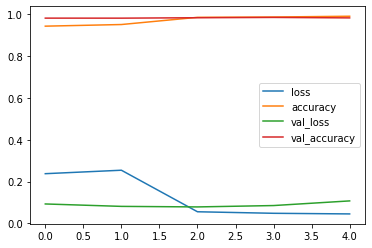

In [ ]:
pd.DataFrame(history.history).plot()

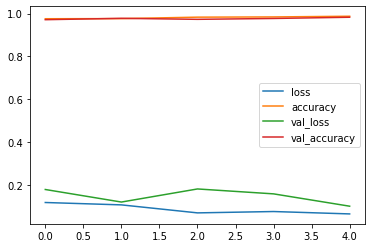

In [ ]:
pd.DataFrame(history2.history).plot()

both model seems to have the same perfomance, we will use bert since it seems to converge slightly faster than roberta.

In [24]:
transformer_model = TFBertForSequenceClassification.from_pretrained('bert-base-cased',num_hidden_layers=2,num_labels=1,hidden_dropout_prob=.2, output_hidden_states=True)

input_ids = tf.keras.Input(shape=(256, ),dtype='int32',name= 'input_ids')
token_type_ids = tf.keras.Input(shape=(256, ), dtype='int32',name= 'token_type_ids')
attention_mask = tf.keras.Input(shape=(256, ), dtype='int32',name= 'attention_mask')

transformer = transformer_model([input_ids, token_type_ids,attention_mask])    
hidden_states = transformer[1] # get output_hidden_states

hidden_states_size = 2 # count of the last states 
hiddes_states_ind = list(range(-hidden_states_size, 0, 1))

selected_hiddes_states = tf.keras.layers.concatenate(tuple([hidden_states[i] for i in hiddes_states_ind]))

# Now we can use selected_hiddes_states as we want
output = tf.keras.layers.Dense(128, activation='relu')(selected_hiddes_states)
output = tf.keras.layers.Dense(1, activation='sigmoid')(output)
model = tf.keras.models.Model(inputs = [input_ids, token_type_ids, attention_mask], outputs = output)

Downloading:   0%|          | 0.00/527M [00:00<?, ?B/s]

Some layers from the model checkpoint at bert-base-cased were not used when initializing TFBertForSequenceClassification: ['bert/encoder/layer_._6/attention/output/dense/kernel:0', 'bert/encoder/layer_._2/output/dense/kernel:0', 'bert/encoder/layer_._10/output/LayerNorm/gamma:0', 'bert/encoder/layer_._2/output/LayerNorm/beta:0', 'bert/encoder/layer_._3/output/dense/bias:0', 'bert/encoder/layer_._3/output/LayerNorm/beta:0', 'bert/encoder/layer_._6/output/LayerNorm/beta:0', 'bert/encoder/layer_._2/output/LayerNorm/gamma:0', 'bert/encoder/layer_._5/attention/output/LayerNorm/gamma:0', 'bert/encoder/layer_._10/attention/output/dense/kernel:0', 'bert/encoder/layer_._6/attention/output/LayerNorm/gamma:0', 'bert/encoder/layer_._9/intermediate/dense/bias:0', 'bert/encoder/layer_._5/attention/output/dense/kernel:0', 'bert/encoder/layer_._5/attention/self/query/bias:0', 'bert/encoder/layer_._3/output/dense/kernel:0', 'bert/encoder/layer_._7/output/LayerNorm/beta:0', 'bert/encoder/layer_._8/atten

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module, class, method, function, traceback, frame, or code object was expected, got cython_function_or_method
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module, class, method, function, traceback, frame, or code object was expected, got cython_function_or_method
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: while/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: while/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experi

Here is our final neural network architecture using bert

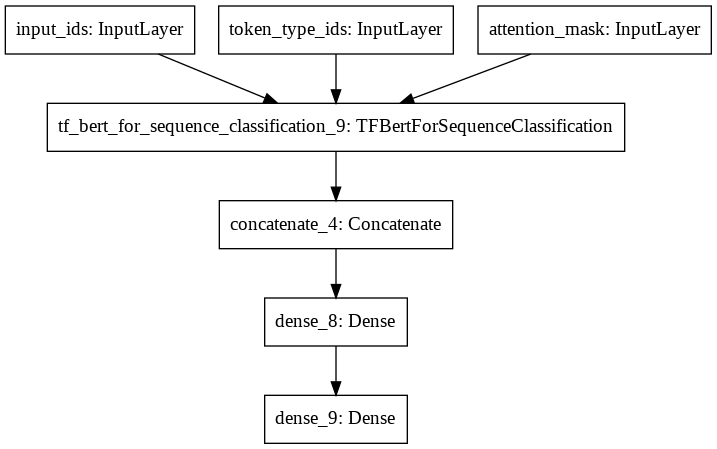

In [ ]:
tf.keras.utils.plot_model(model)

In [27]:
model.compile(optimizer=OPTIMIZER,
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [28]:
history = model.fit(ds_train_encoded,
                    epochs=EPOCHS,
                    validation_data=(ds_valid_encoded),
                    # callbacks=callbacks
                    )

Epoch 1/5
689/689 [==============================] - 311s 446ms/step - loss: 0.1898 - accuracy: 0.9126 - val_loss: 0.0450 - val_accuracy: 0.9849
Epoch 2/5
689/689 [==============================] - 309s 449ms/step - loss: 0.0384 - accuracy: 0.9866 - val_loss: 0.0300 - val_accuracy: 0.9901
Epoch 3/5
689/689 [==============================] - 310s 449ms/step - loss: 0.0234 - accuracy: 0.9919 - val_loss: 0.0271 - val_accuracy: 0.9914
Epoch 4/5
689/689 [==============================] - 310s 450ms/step - loss: 0.0140 - accuracy: 0.9954 - val_loss: 0.0266 - val_accuracy: 0.9924
Epoch 5/5
689/689 [==============================] - 310s 450ms/step - loss: 0.0089 - accuracy: 0.9971 - val_loss: 0.0277 - val_accuracy: 0.9928


In [ ]:
history = model.fit(ds_train_encoded,
                    epochs=EPOCHS,
                    validation_data=(ds_valid_encoded),
                    # callbacks=callbacks
                    )

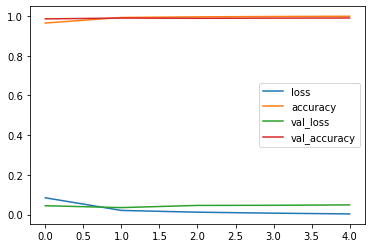

In [ ]:
pd.DataFrame(history.history).plot()

# Evaluation

In [114]:
from sklearn.metrics import classification_report


prob = model.predict(ds_unseen_encoded)
pred = [int(x.mean() > .63) for x in prob]
print(classification_report(pred,y_unseen))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4329
           1       0.99      0.99      0.99      4271

    accuracy                           0.99      8600
   macro avg       0.99      0.99      0.99      8600
weighted avg       0.99      0.99      0.99      8600



In [ ]:
model.evaluate(ds_unseen_encoded)

269/269 [==============================] - 49s 183ms/step - loss: 0.0410 - accuracy: 0.9922


[0.04097171872854233, 0.9921838641166687]

In [116]:
def predict_sentences(words,model,classes=['Sensational','Cases']):

    bert_input = convert_sentence_to_features(words) 
    pred = model.predict(tf.data.Dataset.from_tensor_slices(([bert_input['input_ids']], [bert_input['attention_mask']],[bert_input['token_type_ids']],[0])).map(map_features_to_dict))
    return classes[int(pred.mean() > .63)]

https://sports.yahoo.com/health-officials-warn-white-house-174500685.html

In [123]:
predict_sentences('Two top federal health officials reportedly warned the Biden administration Thursday they might not rubber-stamp COVID vaccine booster shots for the general public as expected later this month.Instead, they might only recommend certain recipients of the Pfizer-BioNTech vaccine be added to the list of people approved for third shots, the New York Times reported Friday.President Biden previously announced a plan that would ask all fully vaccinated Americans to get a booster shot eight months after they received their second shot of either the Pfizer-BioNTech or Moderna vaccines, pending approval from the Food and Drug Administration.He said the booster program was expected to begin Sept. 20, and he planned to get his third shot once eligible.In the meeting Thursday, FDA Acting Commissioner Dr. Janet Woodcock and Dr. Rochelle P. Walensky, who heads the Centers for Disease Control and Prevention, warned the White House that their agencies might only have a more curtailed recommendation to start, The Times reported.Pfizer took until last week to complete its booster shot application with the FDA, and Moderna only initiated its application on Wednesday.On Sept. 17, the FDA’s outside advisory committee is due to publicly review Pfizer’s data supporting a booster shot. Pfizer is asking for approval on booster doses for people 16 and older, but at least one prominent member of the FDA panel who works at a children’s hospital in Pennsylvania has called the request premature.“There is no compelling reason to get a third dose” now, Dr. Paul Offit, director of the Vaccine Education Center at Children’s Hospital of Philadelphia, told The Times.He said the Biden administration’s expectation that the FDA and CDC would go along with its promoted timeline was partially responsible for the announced departures this week of two top FDA vaccine regulators.“Bypassing and marginalizing those agencies led veterans who you need in this pandemic to leave the FDA,” Dr. Offit said, referring to the departures of Dr. Marion Gruber, who heads the FDA’s vaccines office, and her deputy, Dr. Philip Krause.Gruber and Krause reportedly said they wanted to see more data before encouraging third booster shots for the general population starting this month.While research shows the full benefits of vaccination appear to wane over time, it’s still not clear when exactly the Pfizer-BioNTech and Moderna vaccines get to a point that they no longer offer robust enough protection to ward off severe illness and hospitalization.',model)

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2204: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


'Cases'

https://www.ok.co.uk/celebrity-news/aj-bunker-calls-out-hugo-24904694

In [122]:
predict_sentences("Love Island star AJ Bunker has called out Hugo Hammond after a night out they both attended.The stunning Love Island star, who joined as a bombshell during the 2021 series, caught up with OK! while attending the Rise of the Footsoldier premiere alongside co-stars Amy Day and Rachel Finni.Discussing a recent night out she had with some of the Love Island cast, AJ called out Hugo Hammond for his behaviour.She told us: 'We went on a night out with some of the cast the other week, and Hugo was on his phone the whole time. He didn't give us the time of day.'Amy added that he was 'kissing everyone,' to which AJ confirmed: 'He was kissing everyone. He was being a club rat in front of me, Georgia and Amy.'It's like, ok, you didn't want any of us girls but you'll go for some girl you met ten seconds ago in a club,' AJ added.During this series of Love Island, Hugo was romantically linked with both AJ and Amy Day, but the PE teacher didn't go the distance with either of the stunning stars.",model)

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2204: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


'Sensational'

We can conclude that this dataset contains a lot of bias indicators from an obvious set of words to the topic the text itself contains. We have done data analysis and cleaning and found that the structure of the text itself, the use of words, the topic talked are biased so it's natural to have a high accuracy on the baseline model where it pick up patterns in the text. Bert in the other hand understands the data contextually so it's good to differentiate certain news topic not just by pattern in the text. Although the data itself contains a lot of indicators enough to get to that 94% >  accuracy bert perform better in capturing the topic of the news article achieving 99% accuracy. 

# Conclusion

In conclusion neural network shows to be one of the greatest achievements in the field of NLP, by using BERT we are able to capture contextually the "fake/sensational" nature of news, achieving high accuracy in this dataset test. Futhermore there are still imporvements to be made.

- a broader dataset
- more unbiased dataset